In [42]:
import pandas as pd
import glob
import matplotlib.pyplot as plt


In [43]:
csv_files = glob.glob(r'.\Datasets\*.csv') 
dataframes = [pd.read_csv(file) for file in csv_files]  
wine_df = pd.concat(dataframes, ignore_index=True)
pd.set_option('display.max_columns', None)  
wine_df.head() 

,Unnamed: 0,Name,Rating,Number of Ratings,Price,Region,Winery,Wine style,Alcohol content,Grapes,Food pairings,Bold,Tannin,Sweet,Acidic
0,0,Fields Of Joy Shiraz 2014,4.0,203,28.99,Australia / South Australia / Mount Lofty Rang...,Two Hands,Australian Shiraz,13.794543,NaN,"['Beef', 'Lamb', 'Game (deer, venison)', 'Poul...",85.00,47.13000,20.62,43.570
1,1,Shotfire GSM 2018,3.9,36,19.49,Australia / South Australia / Barossa,Thorn-Clarke,Australian Rhône Blend Red,14.500000,"Mourvedre, Shiraz/Syrah, Grenache","['Beef', 'Pasta', 'Lamb', 'Game (deer, venison)']",85.00,50.63000,9.05,43.000
2,2,Passion has Red Lips 2020,3.8,350,27.50,Australia / South Australia / Fleurieu / McLar...,Some Young Punks,Australian Cabernet - Shiraz,13.794543,NaN,"['Beef', 'Lamb', 'Poultry']",85.00,49.37000,8.19,44.780
3,3,The Hermit Crab Viognier - Marsanne 2018,3.8,1026,16.99,Australia / South Australia / Fleurieu / McLar...,d'Arenberg,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555
4,4,Cabernet Sauvignon (Batch No. 1 & 3) 2019,3.8,969,14.99,Australia / South Eastern Australia,Gentleman's Collection,Australian Cabernet Sauvignon,13.794543,NaN,"['Beef', 'Lamb', 'Poultry']",76.34,49.36000,16.02,47.890


In [44]:
wine_df.columns

Index(['Unnamed: 0', 'Name', 'Rating', 'Number of Ratings', 'Price', 'Region',
       'Winery', 'Wine style', 'Alcohol content', 'Grapes', 'Food pairings',
       'Bold', 'Tannin', 'Sweet', 'Acidic'],
      dtype='object')

In [45]:
wine_df.shape #(rows,columns   )

(5145, 15)

In [46]:
wine_df.dtypes

Unnamed: 0             int64
Name                  object
Rating               float64
Number of Ratings      int64
Price                float64
Region                object
Winery                object
Wine style            object
Alcohol content      float64
Grapes                object
Food pairings         object
Bold                 float64
Tannin               float64
Sweet                float64
Acidic               float64
dtype: object

In [47]:
wine_df.describe

<bound method NDFrame.describe of       Unnamed: 0                                               Name  Rating  \
0              0                          Fields Of Joy Shiraz 2014     4.0   
1              1                                  Shotfire GSM 2018     3.9   
2              2                          Passion has Red Lips 2020     3.8   
3              3           The Hermit Crab Viognier - Marsanne 2018     3.8   
4              4          Cabernet Sauvignon (Batch No. 1 & 3) 2019     3.8   
...          ...                                                ...     ...   
5140         667  Katherine Goldschmidt Stonemason Hill Cabernet...     4.1   
5141         668                           Pessimist Red Blend 2020     4.0   
5142         669                            Cabernet Sauvignon 2013     3.8   
5143         670                                  Petit Verdot 2017     4.2   
5144         671                          Freakshow Chardonnay 2020     3.8   

      Number of R

In [48]:
wine_df.describe()

,Unnamed: 0,Rating,Number of Ratings,Price,Alcohol content,Bold,Tannin,Sweet,Acidic
count,5145.000000,5145.000000,5145.000000,5145.000000,5145.000000,5145.000000,5145.000000,5145.000000,5145.000000
mean,503.271914,4.000292,601.032653,27.424618,13.794363,57.990384,46.293535,12.259602,54.096125
std,406.492427,0.157726,2725.500208,10.645818,1.242644,19.081310,11.092394,12.306948,14.463969
min,0.000000,3.700000,25.000000,6.500000,5.000000,0.060000,1.400000,0.010000,7.230000
25%,164.000000,3.900000,73.000000,19.980000,13.500000,45.330000,46.295270,6.230000,44.700000
50%,377.000000,4.000000,189.000000,25.990000,13.794543,61.730000,46.295270,9.050000,53.555000
75%,790.000000,4.100000,483.000000,34.000000,14.000000,69.620000,48.610000,13.200000,63.550000
max,1436.000000,4.600000,159937.000000,155.000000,20.500000,85.000000,85.000000,85.000000,85.000000


In [49]:
wine_df=wine_df.drop(["Unnamed: 0"],axis=1, errors='ignore') #if the column exists, drop it else ignore

In [50]:
print(f"duplicated rows: {wine_df.duplicated().sum()}   ")

duplicated rows: 80   


In [51]:
wine_df=wine_df.drop_duplicates()

In [52]:
wine_df.shape

(5065, 14)

In [53]:
print(f"null values in each column:\n{wine_df.isnull().sum()}   ")

null values in each column:
Name                    0
Rating                  0
Number of Ratings       0
Price                   0
Region                  0
Winery                  3
Wine style            513
Alcohol content         0
Grapes               2138
Food pairings           0
Bold                    0
Tannin                  0
Sweet                   0
Acidic                  0
dtype: int64   


In [54]:
wine_df[wine_df['Winery'].isna()] #check - whether each value in "Winery" is missing (NaN).


,Name,Rating,Number of Ratings,Price,Region,Winery,Wine style,Alcohol content,Grapes,Food pairings,Bold,Tannin,Sweet,Acidic
1890,Prestige Sauternes 2019,4.4,61,21.99,France,NaN,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555
3530,The Nest Sauvignon Blanc 2021,4.2,537,20.49,New Zealand,NaN,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555
3568,Taylors Pass Vineyard Single Vineyard Sauvigno...,4.1,264,26.10,New Zealand,NaN,NaN,13.794543,NaN,[],61.73,46.29527,9.05,53.555


In [55]:
wine_df=wine_df.dropna(subset=['Winery']) #drop rows where "Winery" is NaN

In [56]:
wine_df[wine_df['Winery'].isna()]

,Name,Rating,Number of Ratings,Price,Region,Winery,Wine style,Alcohol content,Grapes,Food pairings,Bold,Tannin,Sweet,Acidic


In [57]:
wine_df['Wine style']=wine_df['Wine style'].fillna('Unknown')   
wine_df['Wine style'].isna().sum()

np.int64(0)

In [58]:
wine_df['Grapes']=wine_df['Grapes'].fillna('Unknown')
wine_df['Grapes'].isna().sum()

np.int64(0)

In [59]:
print(f'null values in each column after handling:\n{wine_df.isnull().sum()}   ')
wine_df.shape

null values in each column after handling:
Name                 0
Rating               0
Number of Ratings    0
Price                0
Region               0
Winery               0
Wine style           0
Alcohol content      0
Grapes               0
Food pairings        0
Bold                 0
Tannin               0
Sweet                0
Acidic               0
dtype: int64   


(5062, 14)

In [60]:
wine_df.dtypes

Name                  object
Rating               float64
Number of Ratings      int64
Price                float64
Region                object
Winery                object
Wine style            object
Alcohol content      float64
Grapes                object
Food pairings         object
Bold                 float64
Tannin               float64
Sweet                float64
Acidic               float64
dtype: object

In [61]:
numerical_cols = ['Price', 'Rating', 'Number of Ratings', 'Alcohol content', 'Bold', 'Tannin', 'Sweet', 'Acidic']

count=0
while count < 1:
    for col in numerical_cols:
        Q1=wine_df[col].quantile(0.25)
        Q3=wine_df[col].quantile(0.75)
        IQR=Q3-Q1
        lower_bound=Q1 - 1.5 * IQR
        upper_bound=Q3 + 1.5 * IQR
        
        wine_df=wine_df[(wine_df[col] > lower_bound) & (wine_df[col] < upper_bound)]  
        count += 1



       

In [62]:
wine_df.shape

(2134, 14)

{'whiskers': [<matplotlib.lines.Line2D at 0x1da20bb39b0>,
 'caps': [<matplotlib.lines.Line2D at 0x1da20bb3fe0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da20bb36e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da20bd04a0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da20bd0770>],
 'means': []}

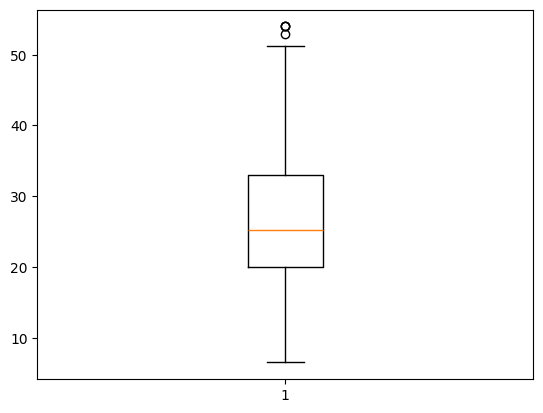

In [77]:
plt.boxplot(wine_df['Price'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da21feb470>,
 'caps': [<matplotlib.lines.Line2D at 0x1da21feba40>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da20c3aa20>],
 'medians': [<matplotlib.lines.Line2D at 0x1da21febf80>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da20d0c230>],
 'means': []}

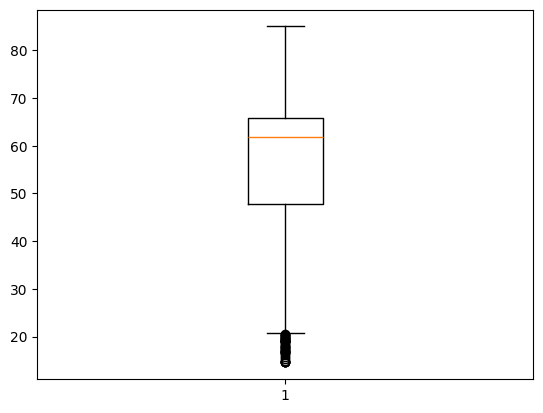

In [86]:
plt.boxplot(wine_df['Bold'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1da1f863c80>,
 'caps': [<matplotlib.lines.Line2D at 0x1da1f864320>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da1f863fb0>],
 'medians': [<matplotlib.lines.Line2D at 0x1da1f864d10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da1f864560>],
 'means': []}

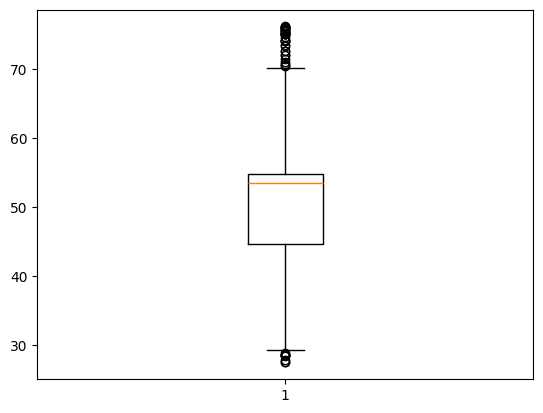

In [66]:
plt.boxplot(wine_df['Acidic'])